In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from patsy.contrasts import Sum
from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA,QuadraticDiscriminantAnalysis as QDA)
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
import seaborn as sns



Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
Actual       0    1   All
Predicted                
0           54   48   102
1          430  557   987
All        484  605  1089
Accuracy: 0.39
Actual Up: 0.89
Actual Down: 0.08


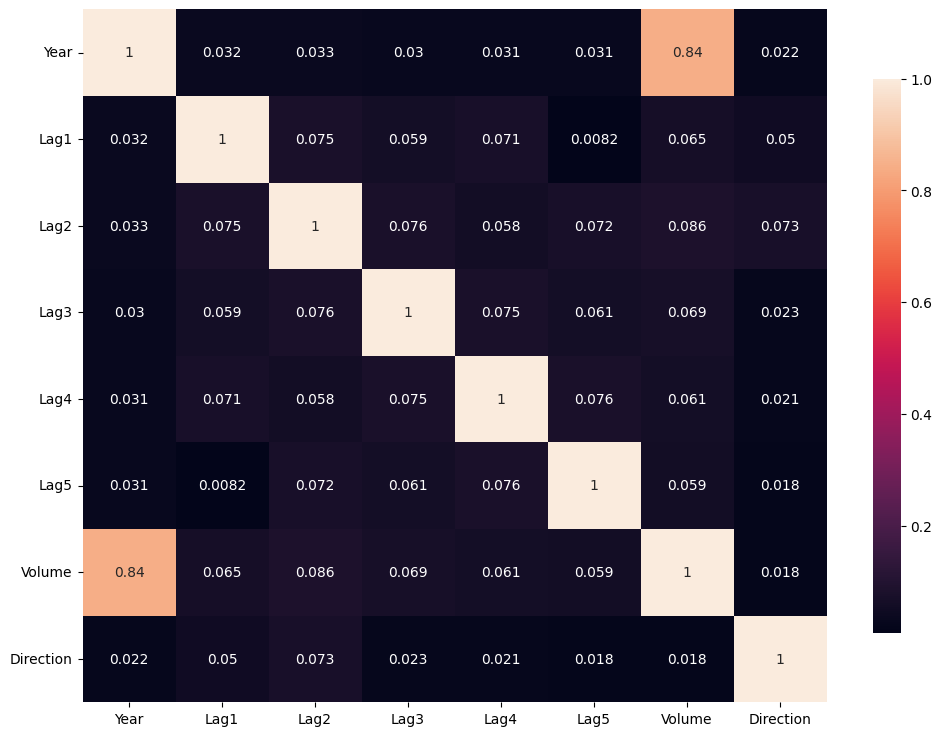

In [368]:
weekly = load_data('Weekly')    
weekly.columns
weekly.head()
weekly['Direction'] = weekly['Direction'].map({'Up': 1, 'Down': 0})
weekly['Direction'] = weekly['Direction'].astype('int')
weekly2= weekly.drop('Today',axis=1)

# visualize the data
corr_matrix = weekly2.corr().abs()
fig, ax     = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=False, annot=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=00)
plt.yticks(rotation=0);

# summarize the data
mm1 = smf.logit(formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly)
mm1 = mm1.fit()
# print(mm1.summary())
pred = mm1.predict()
pred= np.where(pred > 0.5, 1, 0)
confusion = pd.crosstab(weekly['Direction'], pred, rownames=['Actual'], colnames=['Predicted'],margins=True).T
print(confusion)
# calculate the accuracy
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion.values)
type_1 = confusion[0][1]/np.sum([confusion[0][1], confusion[0][0]])
type_2 = confusion[1][0]/np.sum([confusion[1][0], confusion[1][1]])
print(f'Accuracy: {accuracy:.2f}')
print(f'Actual Up: {type_1:.2f}')
print(f'Actual Down: {type_2:.2f}')

(i)Lag2 is slightly correlated with Direction, which is supported by the fact that its p-value is 0.006. all the other variables are not significant which can be seen in the heatmap.

(ii)volume increases with year

(iii)findings of confusion matrix
(a)

Fitting the logistic model
Direction ~ Lag2
Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Actual      0   1
Predicted        
0           9   5
1          34  56
Accuracy: 0.62
fitting the LDA model
<class 'pandas.core.frame.DataFrame'>
Actual      0   1
Predicted        
0           9   5
1          34  56
Accuracy: 0.62
fitting the QDA model
<class 'numpy.ndarray'>
[[ 0 43]
 [ 0 61]]
Accuracy: 0.59
fitting the KNN model
Actual      0   1
Predicted        
0          21  30
1          22  31
Accuracy: 0.50
fitting the GaussianNB model
Actual      0   1
Predicted        
1          43  61
Accuracy: 0.41


/var/folders/q0/zv6v2pdn6fl4mgbbgcf62_kc0000gn/T/ipykernel_21085/2998696729.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Logistic Regression', 'LDA', 'QDA', 'KNN', 'GaussianNB'], y=[logit_accuracy, lda_accuracy2, qda_accuracy, knn_accuracy4, gnb_accuracy], palette='viridis')


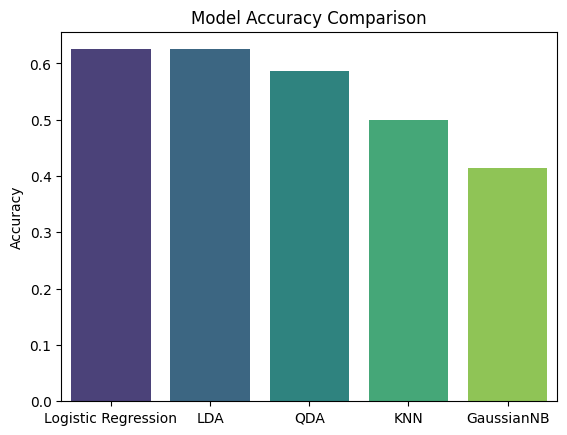

In [369]:

# you need .value to extract the value from the dataframe but only name of the variable if you want to extarcat from array
weekly = load_data('Weekly')
weekly['Direction'] = weekly['Direction'].map({'Up': 1, 'Down': 0})
weekly['Direction'] = weekly['Direction'].astype(int)
data_train = weekly[weekly['Year'] < 2009]
data_test = weekly[weekly['Year'] >= 2009]
# copy() is used to create a new object that is a copy of the original object
x_train = pd.DataFrame(data_train['Lag2']).copy() 
x_test = pd.DataFrame(data_test['Lag2']).copy()
y_train = data_train['Direction']
y_test = data_test['Direction']

# fit the logistic_regression
def fit_model(x_train, y_train,x_test, y_test,data_train, data_test):
    print('Fitting the logistic model')
    # name is used to extract the name of the variable in series
    formula = str(y_train.name + ' ~ ' + ' + '.join(x_train.columns))
    print(formula)
    logistic_regression = smf.logit(formula=formula, data=data_train)
    logistic_regression = logistic_regression.fit();
    pred = logistic_regression.predict(x_test)
    pred= np.where(pred > 0.5, 1, 0)
    confusion = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted']).T
    print(confusion)
    logit_accuracy = np.sum(np.diag(confusion)) / np.sum(confusion.values)
    print(f'Accuracy: {logit_accuracy:.2f}')
    
    
    print('fitting the LDA model')
    lda = LDA(store_covariance=True)
    lda.fit(x_train, y_train)
    pred2 = lda.predict(x_test)
    confusion2 = pd.crosstab(y_test, pred2, rownames=['Actual'], colnames=['Predicted']).T
    print(type(confusion2))
    lda_accuracy2 = np.sum(np.diag(confusion2)) / np.sum(confusion2.values)
    print(confusion2)
    print(f'Accuracy: {lda_accuracy2:.2f}')
    
    
    print('fitting the QDA model')
    qda = QDA(store_covariance=True)
    qda.fit(x_train, y_train)
    pred3 = qda.predict(x_test)
    confusion3= confusion_matrix(y_test, pred3)
    print(type(confusion3))
    qda_accuracy = np.sum(np.diag(confusion3)) / np.sum(confusion3)
    print(confusion3)
    print(f'Accuracy: {qda_accuracy:.2f}')
    
    
    print('fitting the KNN model')
    knn = KNeighborsClassifier(n_neighbors=1)
    # copy = true means that the original data will not be modified
    scaler = StandardScaler(with_mean=True,with_std=True,copy=True)
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    knn.fit(x_train, y_train)
    pred4 = knn.predict(x_test)
    confusion4 = pd.crosstab(y_test, pred4, rownames=['Actual'], colnames=['Predicted']).T
    print(confusion4)
    knn_accuracy4 = np.sum(np.diag(confusion4)) / np.sum(confusion4.values) 
    print(f'Accuracy: {knn_accuracy4:.2f}')  

    print('fitting the GaussianNB model')
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    pred5 = gnb.predict(x_test)
    confusion5 = pd.crosstab(y_test, pred5, rownames=['Actual'], colnames=['Predicted']).T
    print(confusion5)
    gnb_accuracy = np.sum(np.diag(confusion5)) / np.sum(confusion5.values)
    print(f'Accuracy: {gnb_accuracy:.2f}')

    sns.barplot(x=['Logistic Regression', 'LDA', 'QDA', 'KNN', 'GaussianNB'], y=[logit_accuracy, lda_accuracy2, qda_accuracy, knn_accuracy4, gnb_accuracy], palette='viridis')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.show()
    
fit_model(x_train, y_train,x_test, y_test,data_train, data_test)

Fitting the logistic model
Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume
Optimization terminated successfully.
         Current function value: 0.681388
         Iterations 4
Actual      0   1
Predicted        
0          31  44
1          12  17
Accuracy: 0.46
fitting the LDA model
<class 'pandas.core.frame.DataFrame'>
Actual      0   1
Predicted        
0          31  44
1          12  17
Accuracy: 0.46
fitting the QDA model
<class 'numpy.ndarray'>
[[33 10]
 [49 12]]
Accuracy: 0.43
fitting the KNN model
Actual      0   1
Predicted        
0          25  39
1          18  22
Accuracy: 0.45
fitting the GaussianNB model
Actual      0   1
Predicted        
0          42  56
1           1   5
Accuracy: 0.45


/var/folders/q0/zv6v2pdn6fl4mgbbgcf62_kc0000gn/T/ipykernel_21085/2998696729.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Logistic Regression', 'LDA', 'QDA', 'KNN', 'GaussianNB'], y=[logit_accuracy, lda_accuracy2, qda_accuracy, knn_accuracy4, gnb_accuracy], palette='viridis')


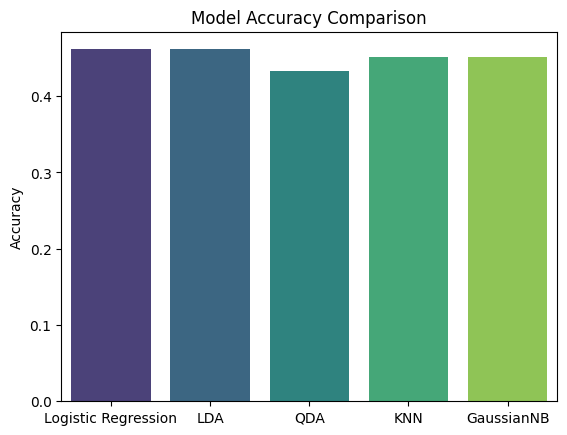

In [370]:
data_train = weekly[weekly['Year'] < 2009]
data_test = weekly[weekly['Year'] >= 2009]
x_train1 = pd.DataFrame(data_train.drop(['Direction','Year','Today'], axis=1)).copy()
x_test1 = pd.DataFrame(data_test.drop(['Direction','Year','Today'], axis=1)).copy()
y_train1 = data_train['Direction']
y_test1 = data_test['Direction']
# print(x_train1)
# print(x_test1)
# print(y_train1)
# print(y_test1)
fit_model(x_train1, y_train1,x_test1, y_test1,data_train, data_test)

#

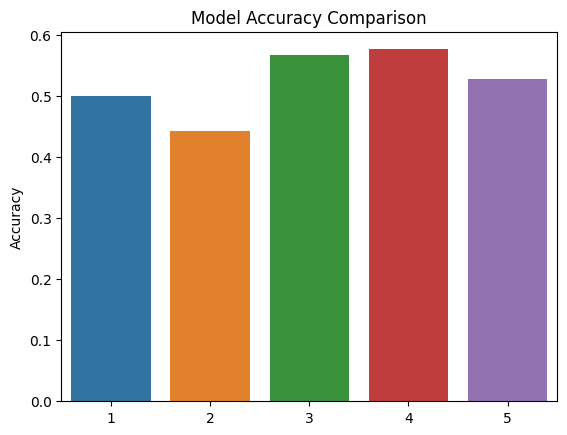

In [371]:
for i in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=i)
    scaler = StandardScaler(with_mean=True,with_std=True,copy=True)
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    confusion = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted']).T
    accuracy = np.sum(np.diag(confusion)) / np.sum(confusion.values)
    sns.barplot(x=[i], y=[accuracy])
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
plt.show();

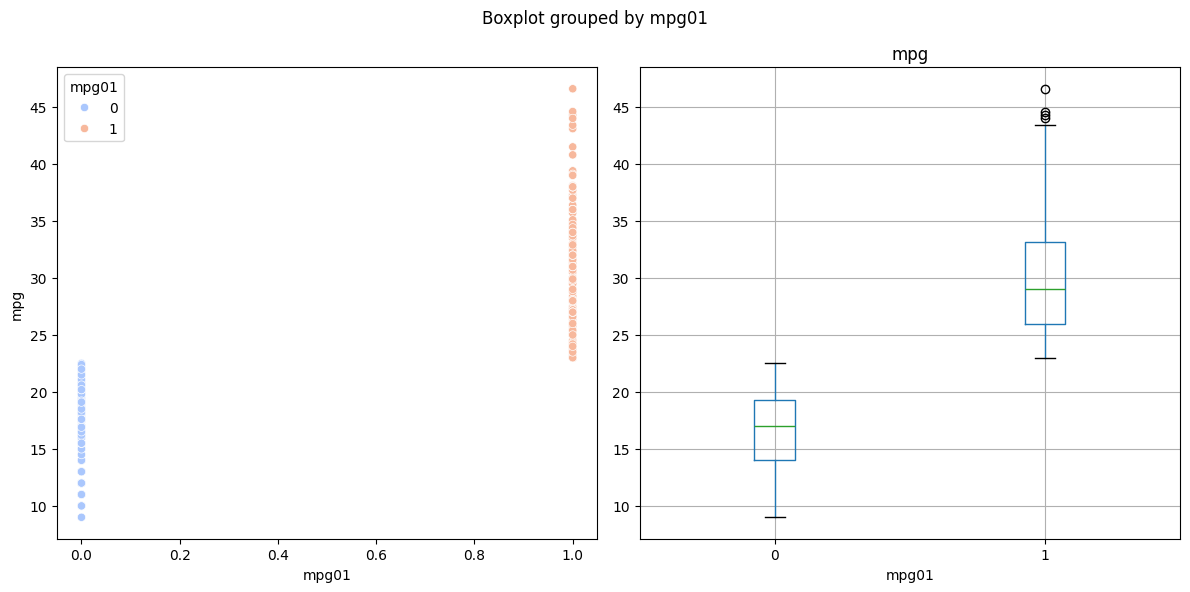

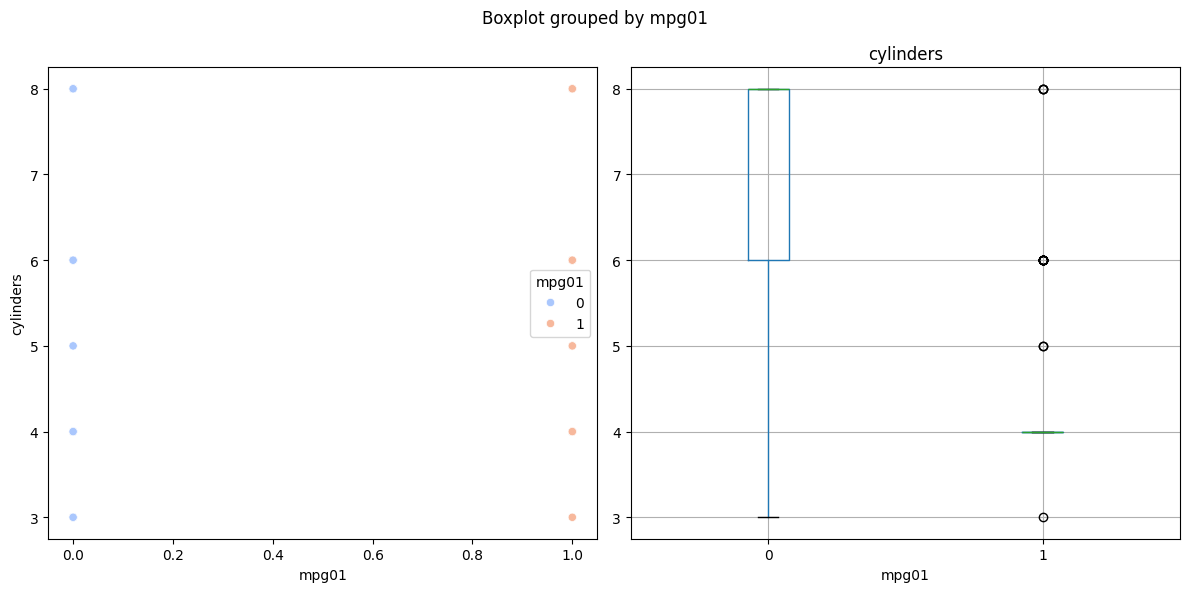

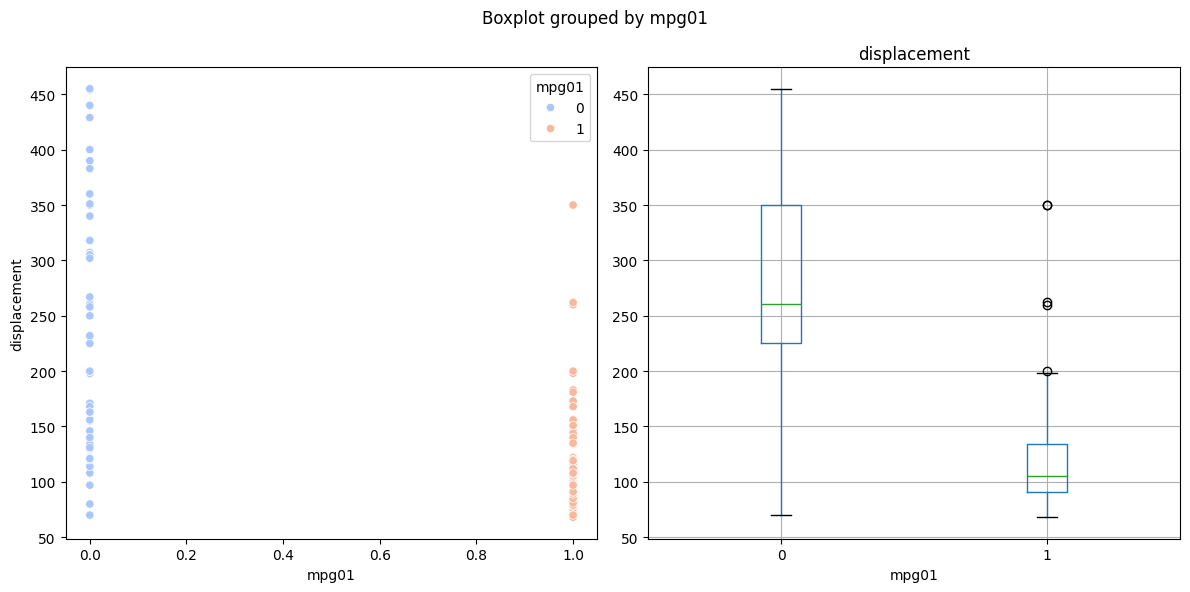

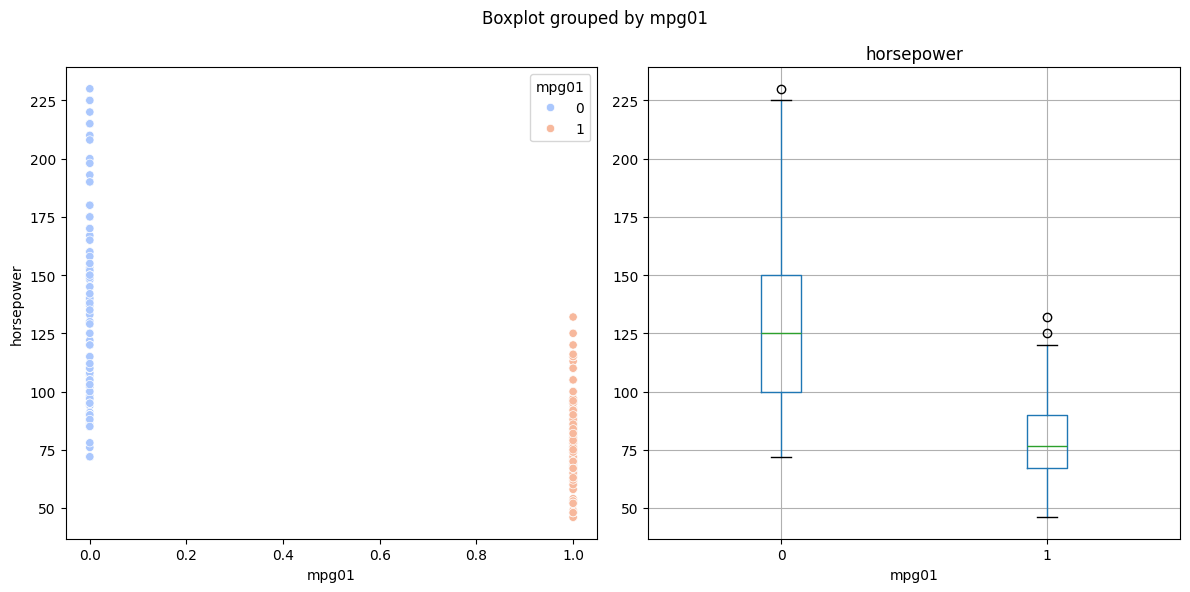

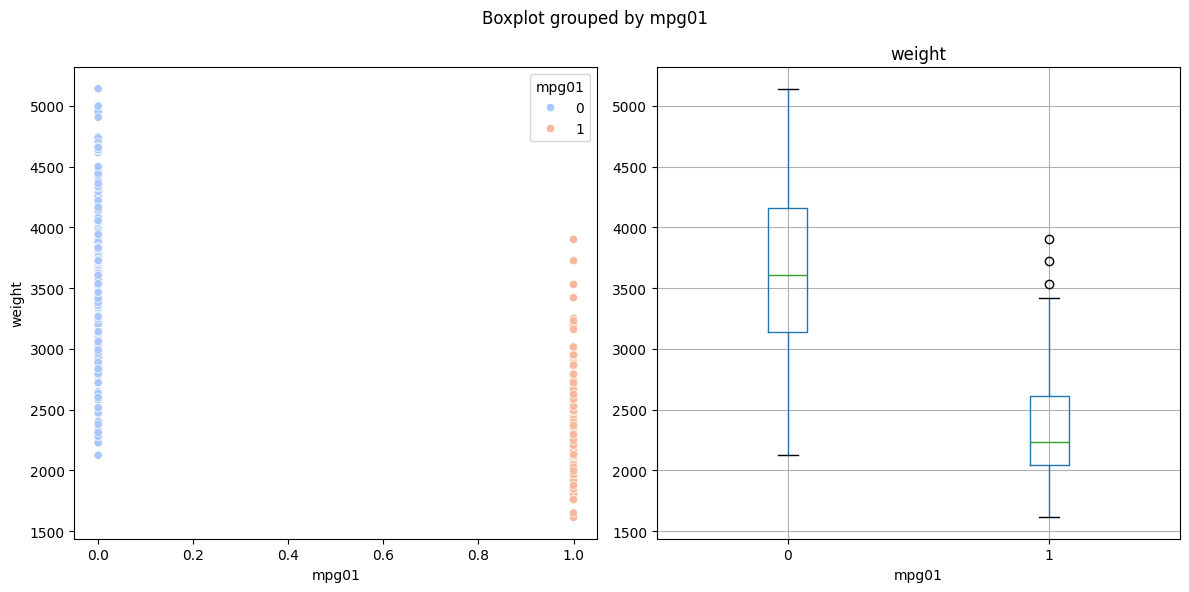

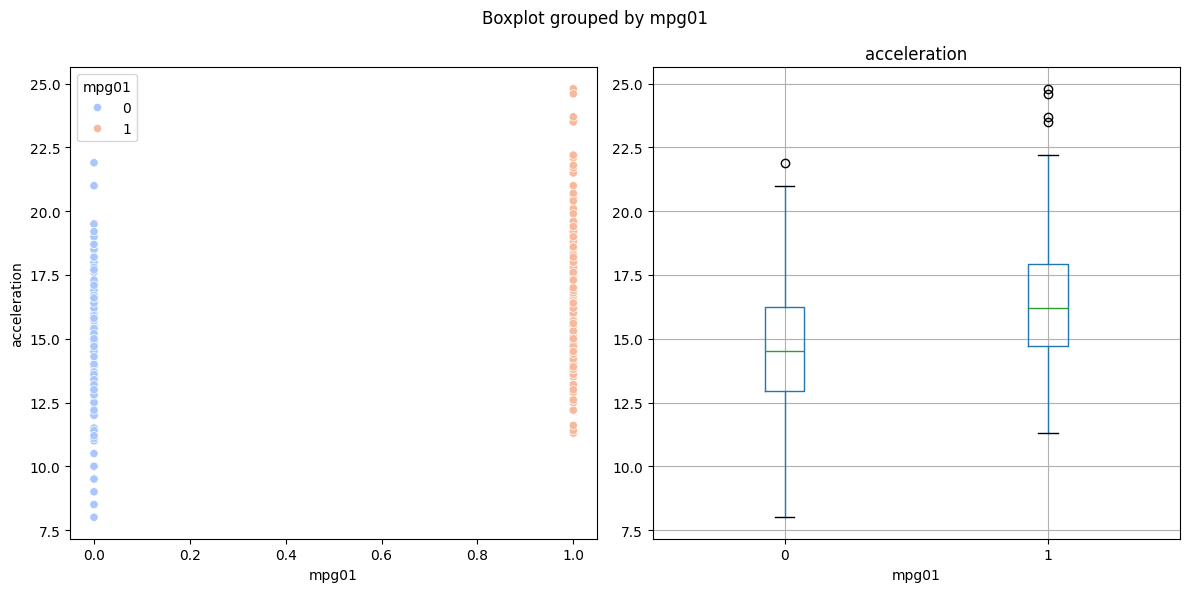

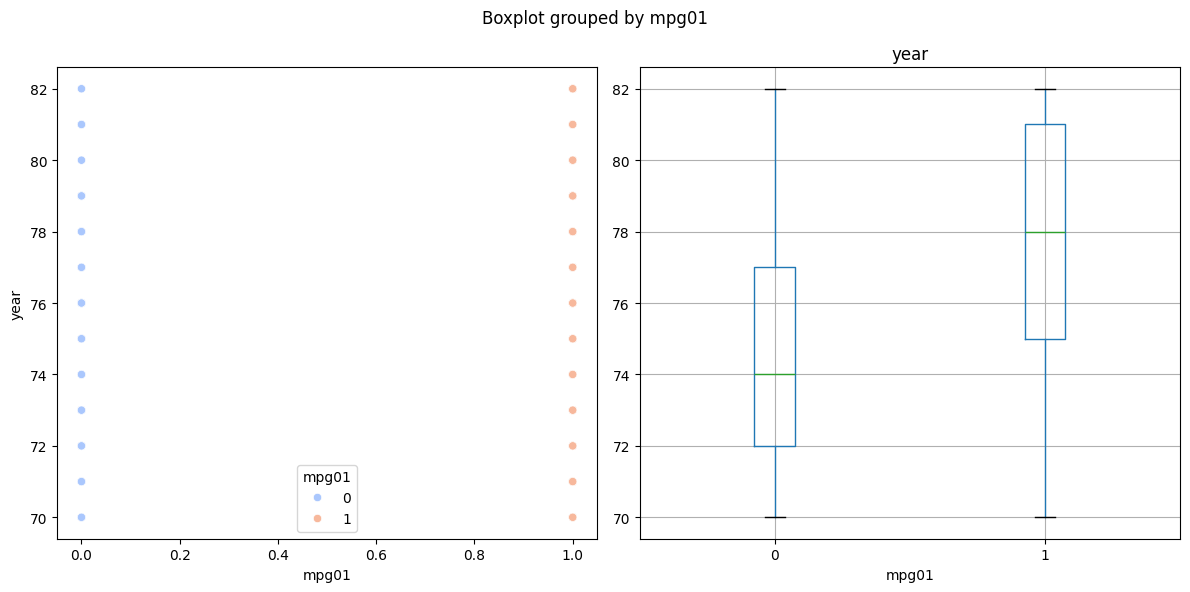

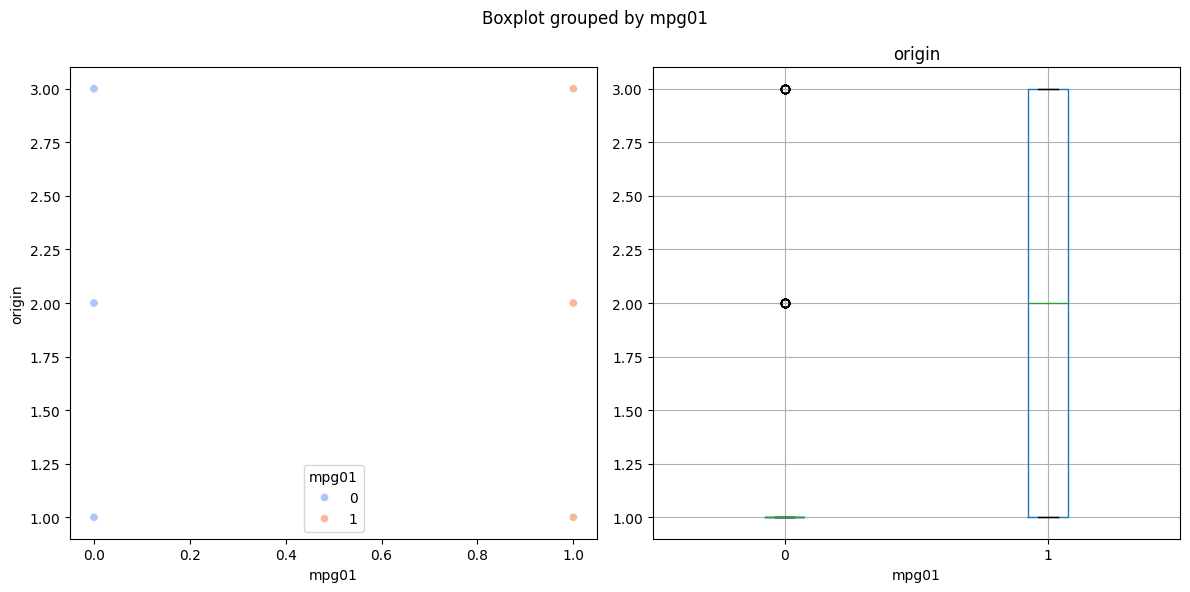

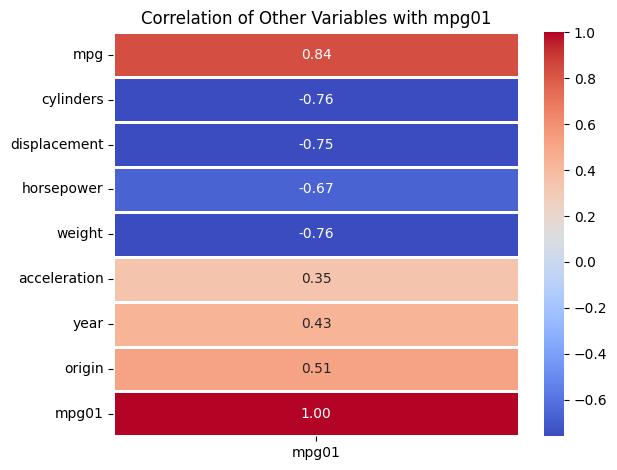

In [372]:
auto = load_data('Auto')
auto.columns
auto['mpg01']=np.where(auto['mpg']>np.median(auto['mpg']),1,0)
# hue to create a color palette for binary classification
# palette to create a color palette for binary classification

# auto.corr()[['mpg01']] creates a 2d array while auto.corr()['mpg01'] creates a 1d array
corr_matrix = auto.corr()[['mpg01']]

# pairwise plots
for i in auto.columns.drop(['mpg01']):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.scatterplot(data=auto, y=i, x='mpg01', hue='mpg01', palette='coolwarm',ax=ax[0])
    auto.boxplot(column=i, by='mpg01', ax=ax[1])
    plt.tight_layout()
    plt.show()

# Plot heatmap
# linewidth is the width of the lines that will divide each cell
sns.heatmap(corr_matrix,annot=True , cmap='coolwarm', fmt=".2f",linewidths=0.9)
plt.title("Correlation of Other Variables with mpg01")
plt.tight_layout()

plt.show()

cylinders displacement horsepower and weight seems to be associated with mgf01

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'mpg01'],
      dtype='object')
Fitting the logistic model
mpg01 ~ cylinders + displacement + horsepower + weight
Optimization terminated successfully.
         Current function value: 0.193150
         Iterations 9
Actual      0   1
Predicted        
0          20  21
1           0  77
Accuracy: 0.82
fitting the LDA model
<class 'pandas.core.frame.DataFrame'>
Actual      0   1
Predicted        
0          18  16
1           2  82
Accuracy: 0.85
fitting the QDA model
<class 'numpy.ndarray'>
[[18  2]
 [19 79]]
Accuracy: 0.82
fitting the KNN model
Actual      0   1
Predicted        
0          19  24
1           1  74
Accuracy: 0.79
fitting the GaussianNB model
Actual      0   1
Predicted        
0          18  14
1           2  84
Accuracy: 0.86


/var/folders/q0/zv6v2pdn6fl4mgbbgcf62_kc0000gn/T/ipykernel_21085/2998696729.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Logistic Regression', 'LDA', 'QDA', 'KNN', 'GaussianNB'], y=[logit_accuracy, lda_accuracy2, qda_accuracy, knn_accuracy4, gnb_accuracy], palette='viridis')


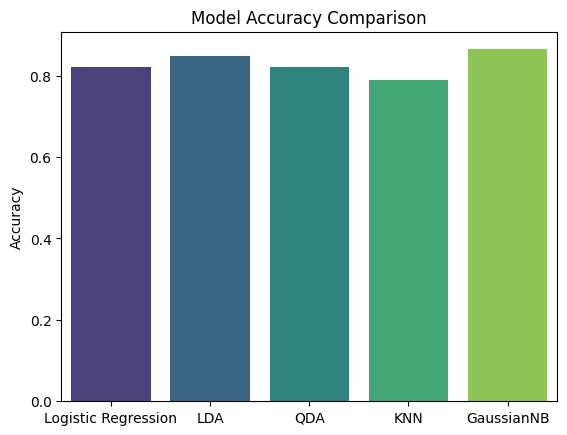

Fitting the logistic model
mpg01 ~ cylinders + displacement + horsepower + weight
Optimization terminated successfully.
         Current function value: 0.244742
         Iterations 9
Actual      0   1
Predicted        
0          17  12
1           3  86
Accuracy: 0.87
fitting the LDA model
<class 'pandas.core.frame.DataFrame'>
Actual      0   1
Predicted        
0          18  16
1           2  82
Accuracy: 0.85
fitting the QDA model
<class 'numpy.ndarray'>
[[18  2]
 [19 79]]
Accuracy: 0.82
fitting the KNN model
Actual      0   1
Predicted        
0          19  24
1           1  74
Accuracy: 0.79
fitting the GaussianNB model
Actual      0   1
Predicted        
0          18  14
1           2  84
Accuracy: 0.86


/var/folders/q0/zv6v2pdn6fl4mgbbgcf62_kc0000gn/T/ipykernel_21085/2998696729.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Logistic Regression', 'LDA', 'QDA', 'KNN', 'GaussianNB'], y=[logit_accuracy, lda_accuracy2, qda_accuracy, knn_accuracy4, gnb_accuracy], palette='viridis')


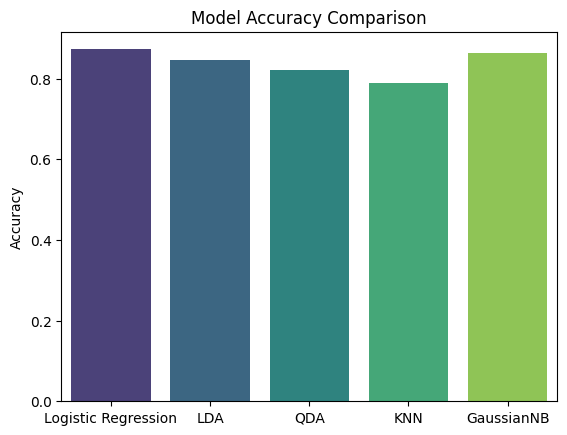

In [373]:
print(auto.columns)
auto.head()
auto['year'].unique()
# year wise split
train = auto.iloc[:int(0.7*len(auto))]
test = auto.iloc[int(0.7*len(auto)):]
# random split
train2, test2 = train_test_split(auto, test_size=0.3, random_state=42)

train_x2 = pd.DataFrame(train[['cylinders', 'displacement', 'horsepower', 'weight']]).copy()
train_y2 = train['mpg01']
test_x2 = pd.DataFrame(test[['cylinders', 'displacement', 'horsepower', 'weight']]).copy()
test_y2 = test['mpg01']


fit_model(train_x2, train_y2,test_x2, test_y2,train, test)
fit_model(train_x2, train_y2,test_x2, test_y2,train2, test2)



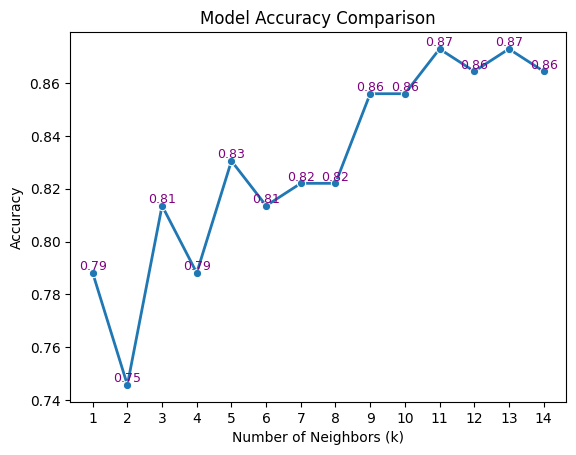

In [374]:
# knn with different values of k
A= []
B= []
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    scaler = StandardScaler(with_mean=True,with_std=True,copy=True)
    train_x2 = scaler.fit_transform(train_x2)
    test_x2 = scaler.transform(test_x2)
    knn.fit(train_x2, train_y2)
    pred = knn.predict(test_x2)
    confusion = pd.crosstab(test_y2, pred, rownames=['Actual'], colnames=['Predicted']).T
    accuracy = np.sum(np.diag(confusion)) / np.sum(confusion.values)
    A.append(i)
    B.append(accuracy)
    # sns.scatterplot(x=[i], y=[accuracy],linewidth=2)
sns.lineplot(x=A,y=B, linewidth=2,marker='o')
plt.xticks(A)
# The zip(A, B) function pairs the elements of A and B together into tuples.[(1, 0.85), (2, 0.88), (3, 0.90)]
for x, y in zip(A, B):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=9, color='purple')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

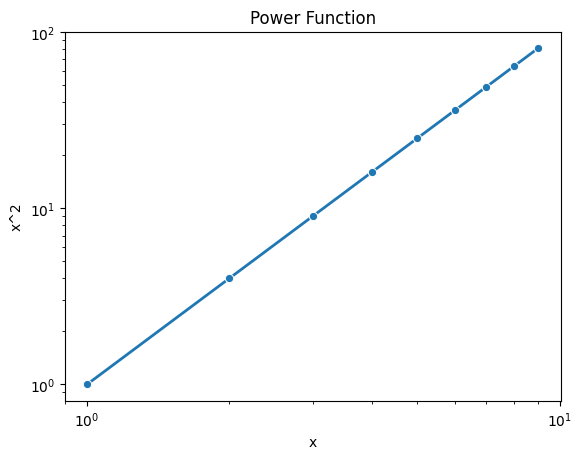

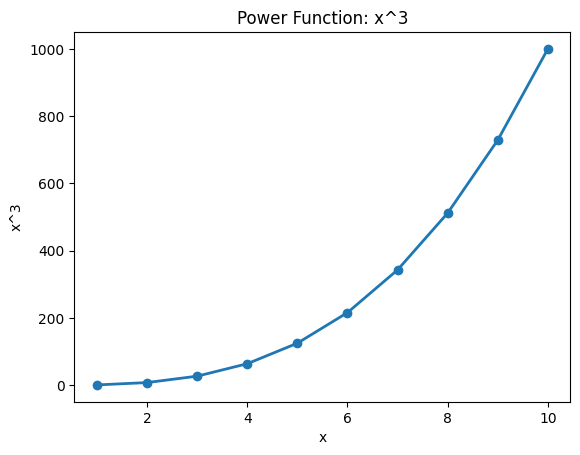

In [375]:
def power(x, y):
    result=x**y
    return (x ** y)
power(3,8)    
power(10,3)
power(8,17)
power(131,3)
z= np.arange(1, 10, 1)
y=power(z,2)
sns.lineplot(x= z , y=y,marker='o', linewidth=2)
plt.xlabel('x')
plt.ylabel('x^2')
plt.xscale('log')
plt.yscale('log')
plt.title('Power Function')
plt.show()


def PlotPower(x, y):
    result = x ** y
    plt.plot(x, result, marker='o', linewidth=2)
    plt.xlabel('x')
    plt.ylabel(f'x^{y}')
    plt.title(f'Power Function: x^{y}')
    plt.show()
PlotPower (np.arange (1, 11) , 3)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')
Fitting the logistic model
crimerate_median ~ zn + indus + nox + age + dis + rad + tax + lstat + ptratio
Optimization terminated successfully.
         Current function value: 0.217887
         Iterations 10
Actual      0   1
Predicted        
0          68  14
1           8  62
Accuracy: 0.86
fitting the LDA model
<class 'pandas.core.frame.DataFrame'>
Actual      0   1
Predicted        
0          74  25
1           2  51
Accuracy: 0.82
fitting the QDA model
<class 'numpy.ndarray'>
[[75  1]
 [13 63]]
Accuracy: 0.91
fitting the KNN model
Actual      0   1
Predicted        
0          74   8
1           2  68
Accuracy: 0.93
fitting the GaussianNB model
Actual      0   1
Predicted        
0          66  17
1          10  59
Accuracy: 0.82


/var/folders/q0/zv6v2pdn6fl4mgbbgcf62_kc0000gn/T/ipykernel_21085/2998696729.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Logistic Regression', 'LDA', 'QDA', 'KNN', 'GaussianNB'], y=[logit_accuracy, lda_accuracy2, qda_accuracy, knn_accuracy4, gnb_accuracy], palette='viridis')


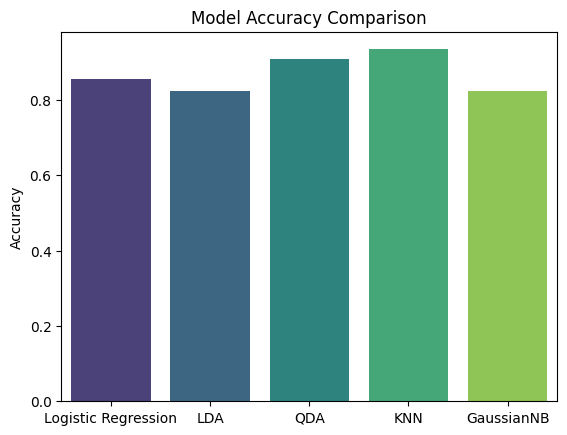

In [376]:
boston = load_data('Boston')
print(boston.columns)
boston['crimerate_median']= np.where(boston['crim']> boston['crim'].median(), 1, 0)
# sns.heatmap(boston.corr()[['crimerate_median']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.9)
train, test = train_test_split(boston, test_size=0.3, random_state=42)
x_train = pd.DataFrame(train[[ 'zn', 'indus', 'nox',  'age', 'dis', 'rad', 'tax', 'lstat','ptratio']]).copy()
x_test = pd.DataFrame(test[[ 'zn', 'indus', 'nox',  'age', 'dis', 'rad', 'tax', 'lstat','ptratio']]).copy()
y_train = train['crimerate_median']
y_test = test['crimerate_median']
fit_model(x_train, y_train,x_test, y_test,train, test)


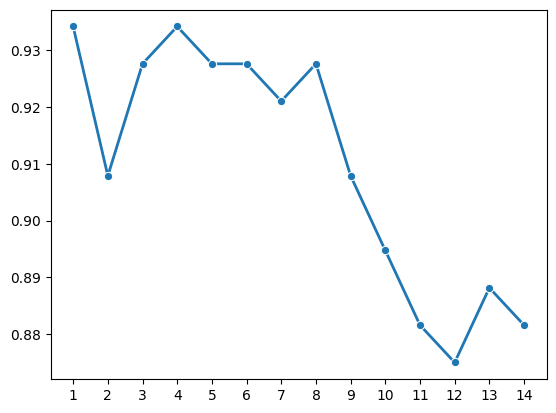

In [377]:
A= []
B= []
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    scaler = StandardScaler(with_mean=True,with_std=True,copy=True)
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    confusion = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted']).T
    accuracy = np.sum(np.diag(confusion)) / np.sum(confusion.values)
    A.append(i)
    B.append(accuracy)
    
sns.lineplot(x=A,y=B, linewidth=2,marker='o')
plt.xticks(A);
